In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [5]:
data = pd.read_csv('student_dataset.csv') 

print(data.head())
print(data.info())
print(data.describe())  


   HoursStudied  PreviousScores ExtracurricularActivities  SleepHours  \
0             7              99                       Yes           9   
1             4              82                        No           4   
2             8              51                       Yes           7   
3             5              52                       Yes           5   
4             7              75                        No           8   

   SampleQuestionPapersPracticed  PerformanceIndex  
0                              1                91  
1                              2                65  
2                              2                45  
3                              2                36  
4                              5                66  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   HoursStudied 

In [ ]:
data = data.dropna()  
X = data[['HoursStudied', 'PreviousScores']]  
y = data['PerformanceIndex']                

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (10000, 2)
Target shape: (10000,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7000, 2)
X_test shape: (3000, 2)
y_train shape: (7000,)
y_test shape: (3000,)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train) 

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [2.86449217 1.01615225]
Intercept: -29.605360900459978


In [11]:
predictions = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

print(results.head(20))


      Actual  Predicted
6252      51  54.831605
4684      20  22.866627
1731      46  47.350610
4742      28  30.259986
4521      41  44.302153
6340      59  60.192660
576       48  47.534575
5202      87  85.132208
6363      37  37.189088
439       73  70.722112
2750      66  63.144788
7487      30  25.915084
5272      61  63.241117
5653      45  44.486118
3999      52  48.182798
6033      41  46.422093
582       63  57.599768
9930      78  79.683517
7051      63  66.377209
8158      42  45.870199


In [13]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.99
RMSE: 2.28


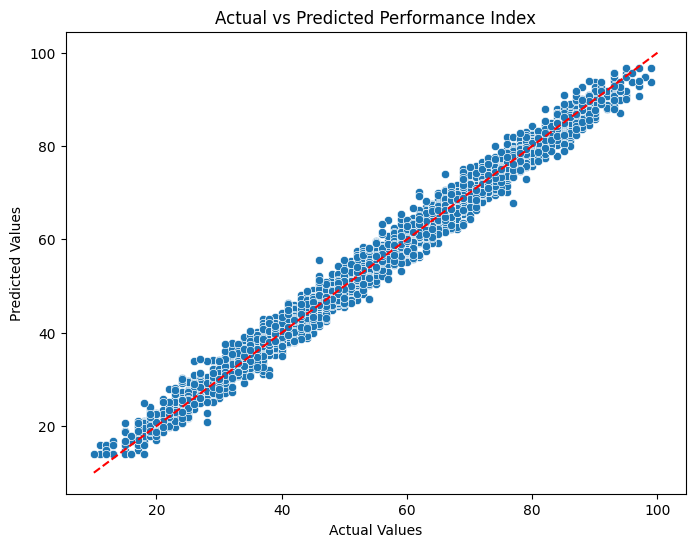

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Performance Index')
plt.show()
